### <u>Projet 2 </u>:

### Explorer et comprendre les performances des employés

#### 1- Importation des packages et du dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [12]:
df = pd.read_csv('HRDataset_v14.csv')
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


### 2- Analyses exploratoires

In [14]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [15]:
df.shape # Pour voir les dimensions de dataset

(311, 36)

In [16]:
df.info()   #Pour voir les informations des colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [17]:
df.describe()  # Pour voir les stats descriptives

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [18]:
def Calculer_âge (date_str):  
    mois, jour, annee = date_str.split('/')
    annee = int(annee)
    if annee <= 25 :
        annee += 2000
    else :
        annee += 1900
    DDN = datetime(year=annee, month=int(mois), day=int(jour))
    aujourdhui = datetime.today()
    âge = aujourdhui.year - DDN.year
    if (aujourdhui.month, aujourdhui.day) < (DDN.month, DDN.day):
        âge -=1
    return âge
df['Âge'] = df['DOB'].apply(Calculer_âge)
print(df['Âge'])   # La fonction me permet de calculer les âges des employés en fonction de leurs dates de naissance 
                    # et de la date d'aujourd'hui

0      42
1      50
2      36
3      36
4      35
       ..
306    40
307    43
308    45
309    46
310    46
Name: Âge, Length: 311, dtype: int64


In [19]:
df = df.replace('DOB', 'Âge') 
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Âge
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,42
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,50
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,36
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,36
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13,40
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4,43
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16,45
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11,46


#### A-Démographie et diversité

In [21]:
df['GenderID'].value_counts(normalize=True)*100   # Répartition par Genre des employés

GenderID
0    56.59164
1    43.40836
Name: proportion, dtype: float64

###### Nous remarquons que la majorité des employés(anciens et actuels) de l'entreprise sont des femmes

In [23]:
df['MaritalDesc'].value_counts(normalize=True)*100  # Répartition par statut matrimonial

MaritalDesc
Single       44.051447
Married      39.871383
Divorced      9.646302
Separated     3.858521
Widowed       2.572347
Name: proportion, dtype: float64

###### Ici, nous remarquons que :
###### - 44.05% des employés sont célibataires
###### - 39.87% sont mariés
###### - 9.64% sont divorcés
###### - 3.85% sont séparés et
###### - 2.57% d'entre eux sont veufs

In [25]:
df['RaceDesc'].value_counts(normalize=True)*100  # Répartition par race

RaceDesc
White                               60.128617
Black or African American           25.723473
Asian                                9.324759
Two or more races                    3.536977
American Indian or Alaska Native     0.964630
Hispanic                             0.321543
Name: proportion, dtype: float64

###### - La population est très majoritairement blanche (> 60%), suivie des Afro-Américains (~25%), ce qui donne une forte polarisation autour de deux grands groupes.
###### - Les autres groupes représentent moins de 10% chacun, ce qui peut influencer :
###### - Les dynamiques culturelles internes
###### - Les politiques RH d’inclusion
###### - Les perceptions d’équité et d’appartenance


#### B- Performance et Satisfaction

In [28]:
df['PerformanceScore'].value_counts(normalize=True)*100  # Répartition par performance

PerformanceScore
Fully Meets          78.135048
Exceeds              11.897106
Needs Improvement     5.787781
PIP                   4.180064
Name: proportion, dtype: float64

In [29]:
corr_sat = df[['EngagementSurvey','EmpSatisfaction','Salary']].corr()
print(corr_sat)

                  EngagementSurvey  EmpSatisfaction    Salary
EngagementSurvey          1.000000         0.187105  0.064966
EmpSatisfaction           0.187105         1.000000  0.062718
Salary                    0.064966         0.062718  1.000000


In [30]:
df_Termd_0 = df[df['Termd']==0]
df_Termd_0['DaysLateLast30'].sum()

60

In [31]:
df['TermReason'].value_counts()

TermReason
N/A-StillEmployed                   207
Another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
no-call, no-show                      4
military                              4
retiring                              4
performance                           4
maternity leave - did not return      3
medical issues                        3
Learned that he is a gangster         1
Fatal attraction                      1
gross misconduct                      1
Name: count, dtype: int64

In [32]:
def Categorie_raison(reason):
    if reason == 'N/A-StillEmployed':
        return 'Toujours employé'
    elif reason in ['Another position', 'more money', 'career change', 'hours']:
        return 'Professionnel'
    elif reason in ['unhappy', 'return to school', 'relocation out of area', 'retiring',
                    'maternity leave - did not return', 'medical issues', 'military']:
        return 'Personnel'
    elif reason in ['attendance', 'no-call, no-show', 'performance', 'gross misconduct',
                    'Learned that he is a gangster', 'Fatal attraction']:
        return 'Disciplinaires'
    else:
        return 'Autre'


df['TermCategory'] = df['TermReason'].apply(Categorie_raison)
df['TermCategory'].value_counts(normalize=True)*100

TermCategory
Toujours employé    66.559486
Professionnel       15.434084
Personnel           12.218650
Disciplinaires       5.787781
Name: proportion, dtype: float64

In [33]:
df['Absences'].groupby(df['DeptID']).sum()

DeptID
1      82
2      10
3     522
4      92
5    2118
6     360
Name: Absences, dtype: int64

In [34]:
df.groupby('DeptID')['DaysLateLast30'].sum()

DeptID
1     0
2     0
3     7
4     4
5    96
6    22
Name: DaysLateLast30, dtype: int64

In [36]:
df[['EmpStatusID','EmploymentStatus']]

,EmpStatusID,EmploymentStatus
0,1,Active
1,5,Voluntarily Terminated
2,5,Voluntarily Terminated
3,1,Active
4,5,Voluntarily Terminated
...,...,...
306,1,Active
307,5,Voluntarily Terminated
308,1,Active
309,1,Active


In [37]:
df['EmpStatusID'].value_counts()

EmpStatusID
1    184
5     88
3     14
4     14
2     11
Name: count, dtype: int64

In [38]:
df['EmploymentStatus'].value_counts()

EmploymentStatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64

In [39]:
# Créer un tableau croisé pour voir les liens
pd.crosstab(df['EmpStatusID'], df['EmploymentStatus'])

EmploymentStatus,Active,Terminated for Cause,Voluntarily Terminated
EmpStatusID,,,
1,182,2,0
2,11,0,0
3,14,0,0
4,0,14,0
5,0,0,88


In [40]:
Incohérence = (df['EmpStatusID']==1) & (df['EmploymentStatus'] == 'Terminated for Cause')
df.loc[Incohérence, 'EmpStatusID'] = 4
pd.crosstab(df['EmpStatusID'], df['EmploymentStatus'])

EmploymentStatus,Active,Terminated for Cause,Voluntarily Terminated
EmpStatusID,,,
1,182,0,0
2,11,0,0
3,14,0,0
4,0,16,0
5,0,0,88


In [41]:
df.loc[df['EmpStatusID'].isin([2, 3]), 'EmpStatusID'] = 1
pd.crosstab(df['EmpStatusID'], df['EmploymentStatus'])

EmploymentStatus,Active,Terminated for Cause,Voluntarily Terminated
EmpStatusID,,,
1,207,0,0
4,0,16,0
5,0,0,88


In [42]:
print(df.duplicated(subset=['Employee_Name', 'EmpID']).sum())  # Exclure les doublons si nécessaire

0


In [44]:
corr_Att = df[['EmpStatusID','Salary', 'EngagementSurvey', 
               'EmpSatisfaction', 'Absences', 'DeptID', 'MaritalStatusID', 'PerfScoreID']].corr()
corr_Att

,EmpStatusID,Salary,EngagementSurvey,EmpSatisfaction,Absences,DeptID,MaritalStatusID,PerfScoreID
EmpStatusID,1.000000,-0.104117,0.000201,-0.002463,0.095151,0.075881,0.106338,-0.075078
Salary,-0.104117,1.000000,0.064966,0.062718,0.082382,-0.448132,-0.070291,0.130903
EngagementSurvey,0.000201,0.064966,1.000000,0.187105,-0.008771,-0.094940,0.033249,0.544927
EmpSatisfaction,-0.002463,0.062718,0.187105,1.000000,0.075222,0.031997,0.002068,0.303579
Absences,0.095151,0.082382,-0.008771,0.075222,1.000000,0.053308,0.018722,0.046629
DeptID,0.075881,-0.448132,-0.094940,0.031997,0.053308,1.000000,0.012768,-0.084811
MaritalStatusID,0.106338,-0.070291,0.033249,0.002068,0.018722,0.012768,1.000000,0.044693
PerfScoreID,-0.075078,0.130903,0.544927,0.303579,0.046629,-0.084811,0.044693,1.000000


### 3- Développement du modèle de prédiction de l'Attrition

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#### A- Préparation des données

In [81]:
# Création de la target (Attrition = 1 si départ volontaire ou licenciement)
df['Attrition'] = df['EmpStatusID'].isin([4, 5]).astype(int)

In [83]:
features = ['Salary', 'EngagementSurvey', 'EmpSatisfaction', 
            'Absences', 'DeptID', 'MaritalStatusID', 'PerformanceScore']
X = df[features]
y = df['Attrition']

In [85]:
# Prétraitement
numeric_features = ['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'Absences']
categorical_features = ['DeptID', 'MaritalStatusID', 'PerformanceScore']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
# Transformation des données
X_processed = preprocessor.fit_transform(X)

In [87]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

#### B- Construction du modèle avec TensorFlow/Keras

In [94]:
# Architecture du modèle
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

C:\Users\godwi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
# Compilation
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 
                      tf.keras.metrics.Precision(name='precision'),
                      tf.keras.metrics.Recall(name='recall')])

# Callback pour early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#### C. Entraînement du modèle

In [99]:
# Entraînement
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    class_weight={0: 1, 1: 3}  # Poids plus important pour la classe minoritaire
)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.5223 - loss: 1.1269 - precision: 0.3116 - recall: 0.4516 - val_accuracy: 0.3810 - val_loss: 0.7193 - val_precision: 0.2927 - val_recall: 0.5455
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4899 - loss: 1.1729 - precision: 0.3912 - recall: 0.7661 - val_accuracy: 0.3651 - val_loss: 0.7446 - val_precision: 0.3448 - val_recall: 0.9091
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4543 - loss: 1.1561 - precision: 0.3728 - recall: 0.7663 - val_accuracy: 0.3651 - val_loss: 0.7647 - val_precision: 0.3500 - val_recall: 0.9545
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3977 - loss: 1.1402 - precision: 0.3371 - recall: 0.8785 - val_accuracy: 0.3651 - val_loss: 0.7661 - val_precision: 0.3500 - val_recall: 0.9545
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3999 - loss: 1.0865 - precision: 0.3227 - recall: 0.8518 - val_accuracy: 0.3333 - val_loss: 0.7678 - val_pre

#### D. Évaluation et visualisation

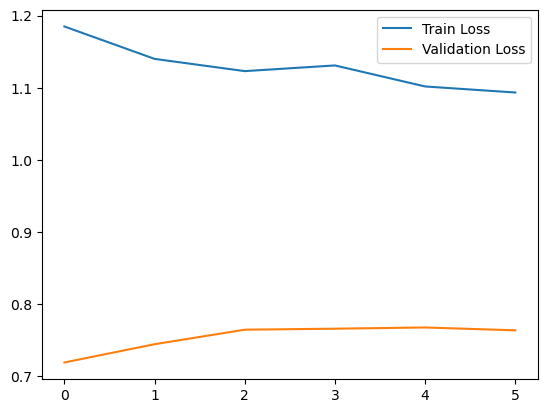

In [102]:

# Courbes d'apprentissage
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [104]:
# Métriques finales
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.3894 - loss: 0.7134 - precision: 0.3012 - recall: 0.5758

Test Accuracy: 0.38
Precision: 0.29
Recall: 0.55


In [108]:
y_pred_log = model.predict(X_test).flatten()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


In [106]:
model.save('attrition_model.h5')  # Format Keras

###### D'après les résultats, le modèle a une précision de 0.36,
###### un rappel de 0.95 et une exactitude de 0.40.
###### Cela suggère que le modèle a tendance à produire beaucoup de faux positifs (faible précision),
###### mais qu'il capture bien les vrais positifs (rappel élevé)